In [2]:

# import packages


import pandas as pd
import numpy as np

import json
import datetime
import math

from datetime import timedelta, datetime

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

import seaborn as sns

In [4]:
#Loading data

df = pd.read_csv('/content/weatherHistory.csv')

In [ ]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
df.isnull().sum() #colume doesn't have any nulls

Formatted Date               0
Summary                      0
Precip Type                 78
Temperature (C)              0
Apparent Temperature (C)     0
Humidity                     0
Wind Speed (km/h)            0
Wind Bearing (degrees)       0
Visibility (km)              0
Loud Cover                   0
Pressure (millibars)         0
Daily Summary                1
dtype: int64

In [6]:
print(df.apply(lambda x: x.nunique()))
df.describe().T.style.background_gradient(
    vmin=-1, vmax=1, cmap=sns.color_palette("vlag", as_cmap=True))

Formatted Date              55343
Summary                        25
Precip Type                     2
Temperature (C)              7035
Apparent Temperature (C)     8431
Humidity                       89
Wind Speed (km/h)            2324
Wind Bearing (degrees)        360
Visibility (km)               869
Loud Cover                      1
Pressure (millibars)         4678
Daily Summary                 166
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Temperature (C),55367.000000,11.610607,9.803405,-21.822222,3.911111,11.561111,18.772222,39.905556
Apparent Temperature (C),55367.000000,10.489658,10.968384,-27.716667,1.694444,11.561111,18.772222,38.377778
Humidity,55367.000000,0.731261,0.195653,0.000000,0.600000,0.780000,0.890000,1.000000
Wind Speed (km/h),55367.000000,10.831618,7.005255,0.000000,5.683300,9.837100,14.184100,63.852600
Wind Bearing (degrees),55367.000000,189.875540,107.661428,0.000000,117.000000,184.000000,291.000000,359.000000
Visibility (km),55367.000000,9.834891,3.864876,0.000000,8.130500,9.982000,11.270000,16.100000
Loud Cover,55367.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pressure (millibars),55367.000000,1004.033894,113.810872,0.000000,1011.790000,1016.500000,1021.370000,1046.380000


In [7]:
def annotate_plot(plots):
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=15, xytext=(0, 8),
                       textcoords='offset points')

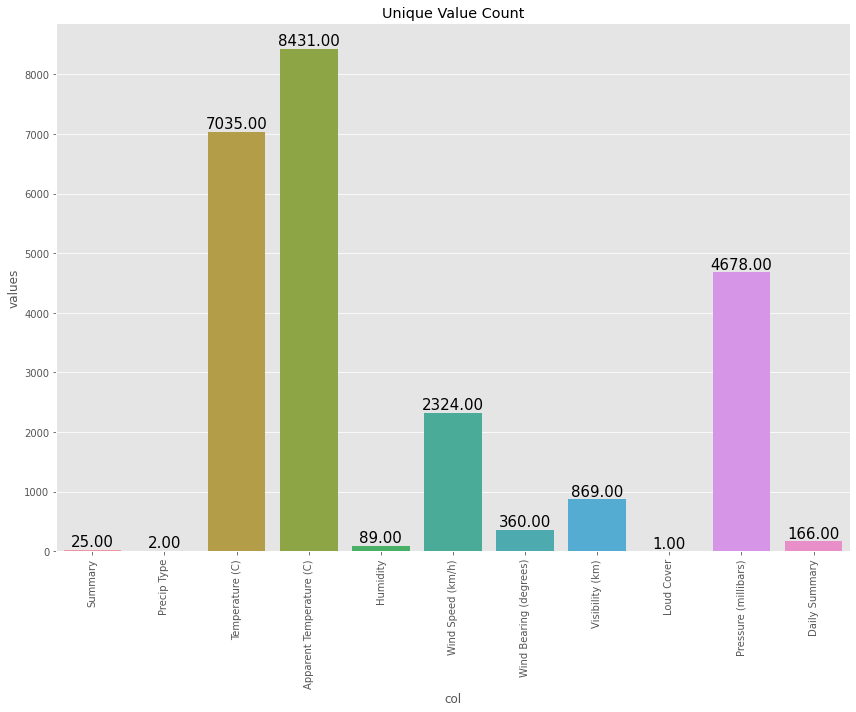

In [8]:
plt.figure(figsize=(12,10))
unique_df = pd.DataFrame(df.apply(lambda x: x.nunique()))
unique_df.drop("Formatted Date",inplace =True)
unique_df = unique_df.reset_index()
unique_df.columns = ["col","values"]
g = sns.barplot(x="col",data = unique_df, y= "values")
annotate_plot(g)
plt.xticks(rotation=90)
plt.title("Unique Value Count")
plt.tight_layout()
plt.show()

In [ ]:
del df['Formatted Date']
del df['Summary']
del df['Loud Cover']
del df['Precip Type']


In [ ]:
X = df[:-1]
X.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [ ]:
X = df[df.columns[:-1]]
X = X._convert(numeric=True)
X.head()

#X = X._convert(numeric=True)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


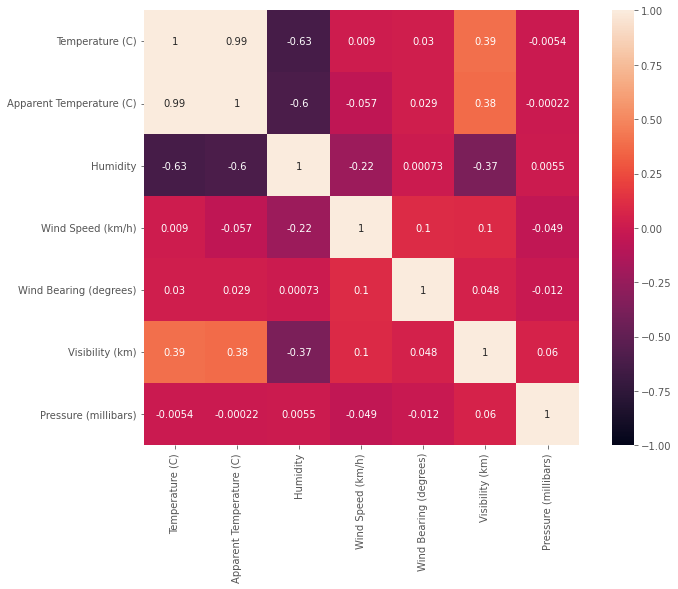

In [ ]:
sns.heatmap(df.corr(), annot=True, square=True, vmin=-1, vmax=1)

In [ ]:
#Eliminating null values

for i in X.columns:
  X[i] = X[i].fillna(int(X[i].mean()))
for i in X.columns:
  print(X[i].isnull().sum())

0
0
0
0
0
0
0


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size = 0.25, random_state =0)
 

In [ ]:
# Feature Scarling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train[:3])

[[-1.71162135  0.34777966]
 [-0.62782594  0.37880344]
 [ 1.72400401  0.06251476]]


In [ ]:
#Fitting Native Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
cm

array([[24,  4],
       [ 2, 20]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


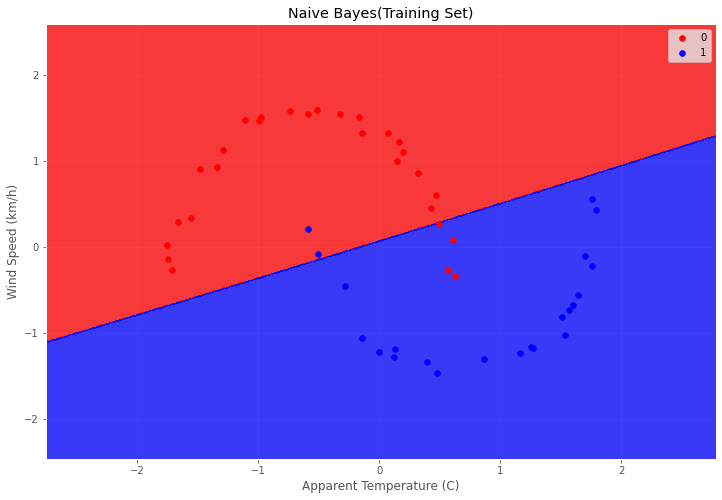

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set= X_test, y_test
X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
             cmap = ListedColormap(('red','blue')))
plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))
for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
                 c= ListedColormap(('red','blue'))(i) ,label= j) 
plt.title('Naive Bayes(Training Set)')
plt.xlabel('Apparent Temperature (C)')
plt.ylabel('Wind Speed (km/h)')
plt.legend()
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.83      0.91      0.87        22

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50

